#  Create a Shapefile from Coordinates in Spreadsheet (Lat Long)

In [1]:
# Import Packages
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import os

In [2]:
# Read csv file
df = pd.read_csv(os.path.join("..", "data", "H2S.csv"))
df.head()

,DISTRICT,COUNTY,AVG CONCEN,Field,FIELD,Formation,FORMATION,FORM_ID,FORM_AGE,ABRV,LONG_NAME,Longitude,Latitude
0,7C,CROCKETT,96000,MIDWAYLANE,MIDWAY LANE,1050SD.,NaN,NaN,NaN,NaN,NaN,-101.300109,30.900531
1,7C,CROCKETT,96000,MIDWAYLANE,MIDWAY LANE,1050SD.,NaN,NaN,NaN,NaN,NaN,-101.300109,30.900531
2,7C,CROCKETT,96000,MIDWAYLANE,MIDWAY LANE,1050SD.,NaN,NaN,NaN,NaN,NaN,-101.300109,30.900531
3,7C,CROCKETT,96000,MIDWAYLANE,MIDWAY LANE,1050SD.,NaN,NaN,NaN,NaN,NaN,-101.300109,30.900531
4,7C,CROCKETT,96000,MIDWAYLANE,MIDWAY LANE,1050SD.,NaN,NaN,NaN,NaN,NaN,-101.300109,30.900531


In [3]:
len(df) 

18350

In [4]:
# Drop any rows that do not have both a latitude and longitude value
df.dropna(subset=['Longitude', 'Latitude'], inplace=True)

In [5]:
len(df) # check if any rows were dropped

18350

In [6]:
# Create the geometry column that is required in shapefiles to recognize coordinates in space
df['geometry'] = df.apply(lambda xy: Point(xy['Longitude'], xy['Latitude']), axis=1)

In [7]:
# Assign the columns you wish to export (can exclude this if you are happy with everything in the dataframe)
df = df[["DISTRICT", "COUNTY", "AVG CONCEN", "Field", "FIELD", "Formation", "FORMATION", 
         "FORM_ID", "FORM_AGE", "ABRV", "LONG_NAME", "Longitude", "Latitude", "geometry"]]

In [8]:
# Assign the proj4 string aka the projection you wnat to assign to your shapefile
proj4 = '+proj=longlat +ellps=WGS84 +datum=WGS84 +no_defs'

In [9]:
# Create the "geodataframe", which is the same as a dataframe but has a spatial component
gdf = gpd.GeoDataFrame(df, geometry='geometry' ,crs=proj4)

In [10]:
gdf.head()

,DISTRICT,COUNTY,AVG CONCEN,Field,FIELD,Formation,FORMATION,FORM_ID,FORM_AGE,ABRV,LONG_NAME,Longitude,Latitude,geometry
0,7C,CROCKETT,96000,MIDWAYLANE,MIDWAY LANE,1050SD.,NaN,NaN,NaN,NaN,NaN,-101.300109,30.900531,POINT (-101.300109266193 30.90053143071931)
1,7C,CROCKETT,96000,MIDWAYLANE,MIDWAY LANE,1050SD.,NaN,NaN,NaN,NaN,NaN,-101.300109,30.900531,POINT (-101.300109266193 30.90053143071931)
2,7C,CROCKETT,96000,MIDWAYLANE,MIDWAY LANE,1050SD.,NaN,NaN,NaN,NaN,NaN,-101.300109,30.900531,POINT (-101.300109266193 30.90053143071931)
3,7C,CROCKETT,96000,MIDWAYLANE,MIDWAY LANE,1050SD.,NaN,NaN,NaN,NaN,NaN,-101.300109,30.900531,POINT (-101.300109266193 30.90053143071931)
4,7C,CROCKETT,96000,MIDWAYLANE,MIDWAY LANE,1050SD.,NaN,NaN,NaN,NaN,NaN,-101.300109,30.900531,POINT (-101.300109266193 30.90053143071931)


In [11]:
# Check that it worked, quickly in a plot
gdf.plot(); 

# Querying with Geopandas

In [12]:
# Query your data to only grab district 8
gdf_Dist8 = gdf[gdf["DISTRICT"] == "8"]

In [13]:
len(gdf_Dist8)

12985

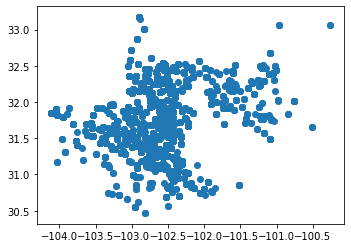

In [14]:
gdf_Dist8.plot();

In [15]:
# Query your data to only grab district 8
gdf_ellen = gdf[gdf["FORMATION"] == "ELLENBURGER"]

In [16]:
len(gdf_ellen)

1507

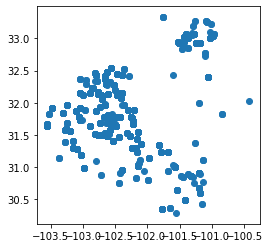

In [17]:
gdf_ellen.plot();

In [18]:
# Query for all Ellenburger formation points in District 8
gdf_ellen_Dist8 = gdf[(gdf["FORMATION"] == "ELLENBURGER") & (gdf["DISTRICT"] =="8")]

In [19]:
len(gdf_ellen_Dist8)

1128

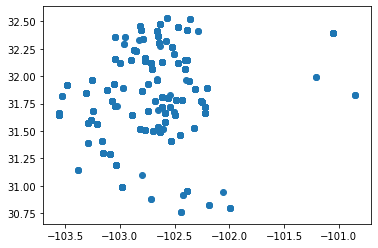

In [20]:
gdf_ellen_Dist8.plot();

In [21]:
# Export all data (no querying) as a shapefile
gdf.to_file(os.path.join("..", "Data", "H2S.shp"))